In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
def conduccion_1d(k, s, L, TA, TB, N):
    """
    Parameters
    ----------
    L: float 
    L es la longitud del dominio 
    
    k: float 
    es la conductividad del material 
    
    s: float 
    es la fuente 
    
    TA: float 
    es la condición de la frontera a la izquierda 
    
    TB: float 
    es la condición de la fronters a la derecha 
    
    N: int 
    Es el número de nodos internos 
    
    """ 
    
#    L= 5.0
#    k= 0.02
#    s= 1 
#    TA= 200
#    TB= 1000

#    N=4
    H= L/(N+1)

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / H**2
    b[:] = s/r
    T[0] = TA
    T[-1] = TB 
    b[0] += TA
    b[-1] += TB 

    A[0,0]=2
    A[0,1]=-1

    for i in range(1,N-1):
        A[i,i]=2 
        A[i,i+1] = -1
        A[i,i-1] = -1 
    
    A[-1,-2]= -1
    A[-1,-1]= 2
    T[1:N+1] = np.linalg.solve(A,b)

    plt.plot(T, 'o-')

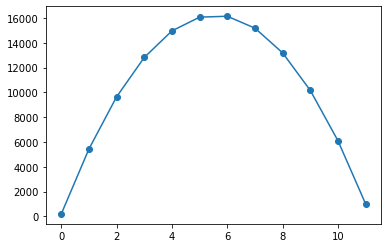

In [18]:
conduccion_1d(0.02, 100, 5.0, 200, 1000, 10)

In [6]:
import ipywidgets as widgets

In [11]:
w = widgets.interactive(conduccion_1d, 
                k = widgets.fixed(0.02),
                s = widgets.FloatSlider(max=100, min=0.0, value=0, step=0.2),
                L = widgets.fixed(5.0),
                TA = widgets.fixed(200),
                TB = widgets.fixed(1000),
                N = widgets.IntSlider(max=80, min=4, value=4))
                
                

In [12]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='s', step=0.2), IntSlider(value=4, description='N', m…